## NetworkX
NetworkX是python下的复杂网络分析包，内置了常用的复杂网络分析算法。

相关参考资料：
1. [NetworkX Documentation](https://networkx.github.io)
2. NetworkX入门笔记
    - [呆思的复杂网络博客](https://challenge19.github.io/2017/01/29/Complex-Networks/)
    - [关于不同程序包效率比较的博客](https://challenge19.github.io/2016/08/15/Network-Analysis-Package-in-Python/)
    - [科学网闫小勇博客](http://blog.sciencenet.cn/home.php?mod=space&uid=404069&do=blog&classid=141080&view=me&from=space)

In [1]:
## load packages
import networkx as nx
import numpy as np #数值计算包
import scipy as sp #科学计算包
import matplotlib.pyplot as plt #绘图包

## 简单的统计分析--以空手道俱乐部网络为例

空手道俱乐部网络是复杂网络分析中常用的一个例子网络，在分析节点中心性和社团结构等问题时都会被使用。
因此Networkx中也自带了空手道俱乐部网，以如下方式调用：
```python
G = nx.karate_club_graph()
```

也可以从外部文件读入数据

```python
G = nx.read_edgelist('./data/karate.csv',comments='S',delimiter=',',create_using=nx.Graph(),data=(('type', str),))#数据的位置，产生为什么网络（这里是无向网络），数据是如何分列的
```

In [2]:
##读取 空手道俱乐部 网络
G = nx.karate_club_graph()

接下来对该网络进行一些简单的统计分析。


#### 节点和边

网络节点的数量：
```python
N = G.number_of_nodes()  # len(G.nodes())
```

网络边的数量：
```python
N = G.number_of_edges()  # len(G.edges())
```

In [3]:
## 节点和边的数量

N = G.number_of_nodes()
L = G.number_of_edges()

print('total nodes:',N)
print('total edges:',L)

total nodes: 34
total edges: 78


#### 节点的度

节点的度定义为节点的边的数量(在有向网中，可以是入边或者出边)。

```python
G.degree()  #返回所有节点的度
G.degree(1) #返回特定节点的度
```

degree of each node: {0: 16, 1: 9, 2: 10, 3: 6, 4: 3, 5: 4, 6: 4, 7: 4, 8: 5, 9: 2, 10: 3, 11: 1, 12: 2, 13: 5, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 3, 20: 2, 21: 2, 22: 2, 23: 5, 24: 3, 25: 3, 26: 2, 27: 4, 28: 3, 29: 4, 30: 4, 31: 6, 32: 12, 33: 17}
average degree: 4.588235294117647


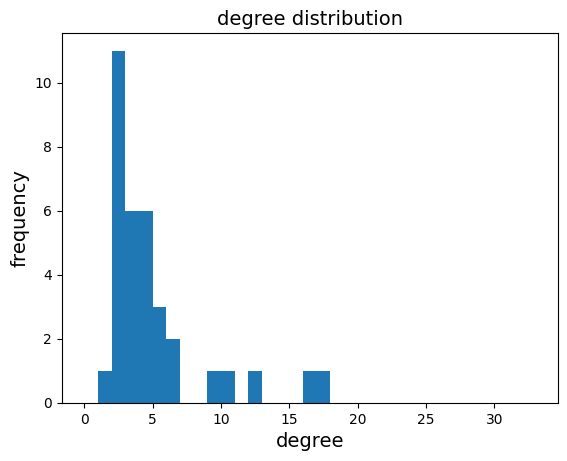

In [19]:
## 节点的度

degs = nx.degree(G)
degs=dict(degs)
print('degree of each node:',degs)
print('average degree:',np.mean(list(degs.values())))
## 度分布 统计分布图

plt.hist(degs.values(), bins=range(N))
plt.xlabel('degree',fontsize=14)
plt.ylabel('frequency',fontsize=14)
plt.title('degree distribution',fontsize=14)
plt.show()

#### 集聚系数

$$c_i=\frac{\sum_j\sum_m A_{ij}A_{jm}A_{mi}}{k_i(k_i-1)}$$

$$C = \langle c_i \rangle$$

```python
nx.clustering(G)   #返回所有节点的集聚系数
nx.clustering(G,1) #返回特定节点的集聚系数
```

In [21]:
## 聚集系数
cc = nx.clustering(G)
print('clustering coefficient of each node:',cc)
print('average clustering coefficient:',np.mean(list(cc.values()))) # nx.average_clustering(G)

clustering coefficient of each node: {0: 0.15, 1: 0.3333333333333333, 2: 0.24444444444444444, 3: 0.6666666666666666, 4: 0.6666666666666666, 5: 0.5, 6: 0.5, 7: 1.0, 8: 0.5, 9: 0, 10: 0.6666666666666666, 11: 0, 12: 1.0, 13: 0.6, 14: 1.0, 15: 1.0, 16: 1.0, 17: 1.0, 18: 1.0, 19: 0.3333333333333333, 20: 1.0, 21: 1.0, 22: 1.0, 23: 0.4, 24: 0.3333333333333333, 25: 0.3333333333333333, 26: 1.0, 27: 0.16666666666666666, 28: 0.3333333333333333, 29: 0.6666666666666666, 30: 0.5, 31: 0.2, 32: 0.19696969696969696, 33: 0.11029411764705882}
average clustering coefficient: 0.5706384782076823


我们可以注意到，NetworkX计算得到平均集聚系数与Gephi得到的结果(0.58)有所不同，主要原因是两者在处理度为1的节点时采取了不同的做法：
- Gephi：忽略度为1的节点
- networkx：直接取值为0

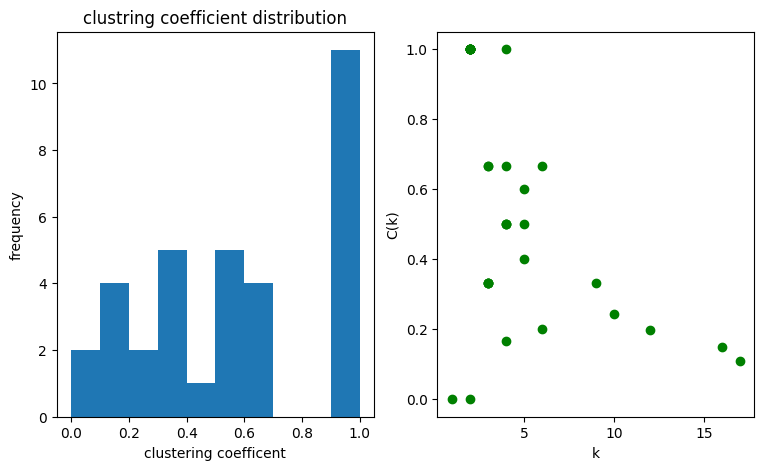

In [22]:
## 聚集系数 统计分布图

plt.figure(figsize=(9,5))
plt.subplot(1,2,1)
plt.hist(cc.values(), bins=10)
plt.xlabel('clustering coefficent')
plt.ylabel('frequency')
plt.title('clustring coefficient distribution')


plt.subplot(1,2,2)
plt.scatter([degs[i] for i in G],[cc[i] for i in G],c='g')
plt.xlabel('k')
plt.ylabel('C(k)')
plt.show()

#### 最短距离

节点间的最短距离$d_{ij}$表示从节点i最少走多少距离可以到节点j。

```python
nx.shortest_path_length(G,source=1,target=2) #返回特定节点间的最短距离
nx.shortest_path_length(G,source=1) #返回特定节点与其它所有节点的最短距离
nx.shortest_path_length(G) #返回所有节点间的最短距离
```

In [24]:
## 两个节点间的最短距离
d12 = nx.shortest_path_length(G, source=2, target=19) # 节点 2 和节点 19间的最短距离
print('SPL between 2 and 19:',d12)


## 节点间最短距离
avg_d = nx.average_shortest_path_length(G) # 平均最短距离
print('average SPL:',avg_d)

SPL between 2 and 19: 2
average SPL: 2.408199643493761


NetworkX 在计算最短距离时，如果遇到网络不联通，会提示错误。有两种处理方式：
1. 分别计算分别每个子联通网络的平均最短距离
2. 将不联通的两个节点的距离记为网络规模N

In [28]:
def spl_1(g):
    spl = []
    for sg in nx.connected_component_subgraphs(g):
        spl.append(nx.average_shortest_path_length(sg))
    return np.mean(spl)


def spl_2(g):
    spl = 0
    N = len(g)
    for sg in nx.connected_component_subgraphs(g):
        n = len(sg)
        if len(sg)>1:
            spl+=nx.average_shortest_path_length(sg) * n*(n-1)
        spl += N*n*(N-n)
    return spl/N/(N-1)

In [30]:
print(nx.betweenness_centrality(G))


nx.betweenness_centrality(G)

{0: 0.43763528138528146, 1: 0.053936688311688304, 2: 0.14365680615680618, 3: 0.011909271284271283, 4: 0.0006313131313131313, 5: 0.02998737373737374, 6: 0.029987373737373736, 7: 0.0, 8: 0.05592682780182781, 9: 0.0008477633477633478, 10: 0.0006313131313131313, 11: 0.0, 12: 0.0, 13: 0.04586339586339586, 14: 0.0, 15: 0.0, 16: 0.0, 17: 0.0, 18: 0.0, 19: 0.03247504810004811, 20: 0.0, 21: 0.0, 22: 0.0, 23: 0.017613636363636363, 24: 0.0022095959595959595, 25: 0.0038404882154882154, 26: 0.0, 27: 0.02233345358345358, 28: 0.0017947330447330447, 29: 0.0029220779220779218, 30: 0.014411976911976909, 31: 0.13827561327561325, 32: 0.145247113997114, 33: 0.30407497594997596}


{0: 0.43763528138528146,
 1: 0.053936688311688304,
 2: 0.14365680615680618,
 3: 0.011909271284271283,
 4: 0.0006313131313131313,
 5: 0.02998737373737374,
 6: 0.029987373737373736,
 7: 0.0,
 8: 0.05592682780182781,
 9: 0.0008477633477633478,
 10: 0.0006313131313131313,
 11: 0.0,
 12: 0.0,
 13: 0.04586339586339586,
 14: 0.0,
 15: 0.0,
 16: 0.0,
 17: 0.0,
 18: 0.0,
 19: 0.03247504810004811,
 20: 0.0,
 21: 0.0,
 22: 0.0,
 23: 0.017613636363636363,
 24: 0.0022095959595959595,
 25: 0.0038404882154882154,
 26: 0.0,
 27: 0.02233345358345358,
 28: 0.0017947330447330447,
 29: 0.0029220779220779218,
 30: 0.014411976911976909,
 31: 0.13827561327561325,
 32: 0.145247113997114,
 33: 0.30407497594997596}

### 随机网理论分析
1. 理论推导随机网络的度分布(二项分布 -> Poisson)
2. 用程序生成ER随机网，改变不同平均度下，随机网的各个统计指标

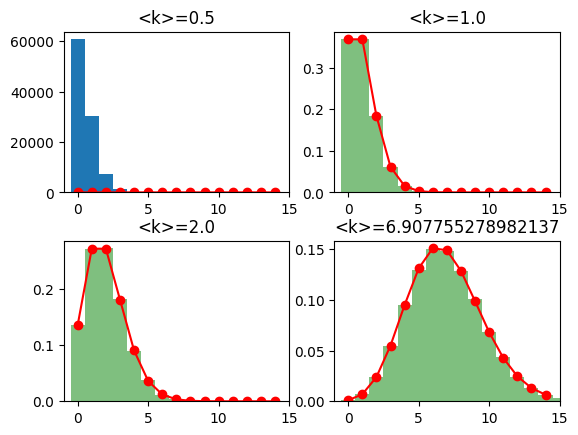

In [39]:
import scipy.stats

N = 1000

krange = [0.5, 1.0, 2.0, np.log(N)]

for i in range(4):
    k = krange[i]
    p = 1.0*k/(N-1)
    deg = []
    for _ in range(100):
        g = nx.erdos_renyi_graph(N, p, directed=False)
        deg += dict(nx.degree(g)).values()
    plt.subplot(2,2,i+1)
    bins = np.arange(-0.5, max(deg)+0.5, 1.0)
    plt.hist(deg, bins = bins,density=True, facecolor='green', alpha=0.5)
    plt.plot(range(15), [scipy.stats.poisson.pmf(xi, k) for xi in range(15)], 'ro-')
    plt.xlim(-1, 15)
    plt.title('<k>=%s'%k)
plt.subplots_adjust(wspace=0.2, hspace=0.3)
plt.show()

#### 连通集团
子网络中任意两点间可以可达(有向网络，可以分为弱连通集团和强连通集团)。


```python
nx.connected_component_subgraphs(g) #返回无向网络的各个连通集团
nx.strongly_connected_componen_subgraphs(g) #返回有向网络的强连通集团
nx.waekly_connected_componen_subgraphs(g) #返回有向网络的弱连通集团
```

In [44]:
N = 1000

krange = np.arange(0.2,2*np.log(N), 0.2)

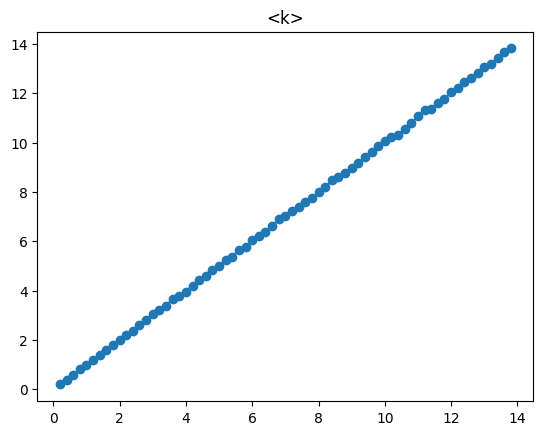

In [45]:
Avg_deg = []
Avg_cls = []
Avg_spl = []
Avg_gcc = []

for k in krange:
    avg_deg = []
    avg_cls = []
    avg_spl = []
    avg_gcc = []
    for _ in range(10):
        p = 1.0*k/(N-1)
        g = nx.erdos_renyi_graph(N, p, directed=False)

        avg_deg.append(np.mean(list(dict(nx.degree(g)).values())))
        avg_cls.append(nx.average_clustering(g))
        avg_gcc.append(max([len(x) for x in nx.connected_components(g)]))
        
    Avg_deg.append(np.mean(avg_deg))
    Avg_cls.append(np.mean(avg_cls))
    Avg_gcc.append(1.0*np.mean(avg_gcc)/N)
plt.plot(krange, Avg_deg, 'o-')
plt.title('<k>')
plt.show()

最大连通集团随着平均度的变化

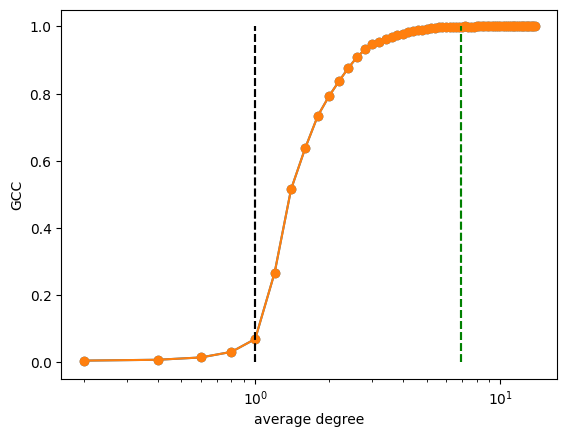

In [47]:
## 最大连通集团
plt.plot(krange, Avg_gcc,'o-')
plt.plot([1,1],[0,1],'k--')
plt.plot([np.log(N)]*2,[0,1],'g--')
plt.xscale('log')
plt.xlabel('average degree')
plt.ylabel('GCC')
plt.show()

集聚系数随着平均度的变化

$$C = \frac{\langle k \rangle}{N}$$

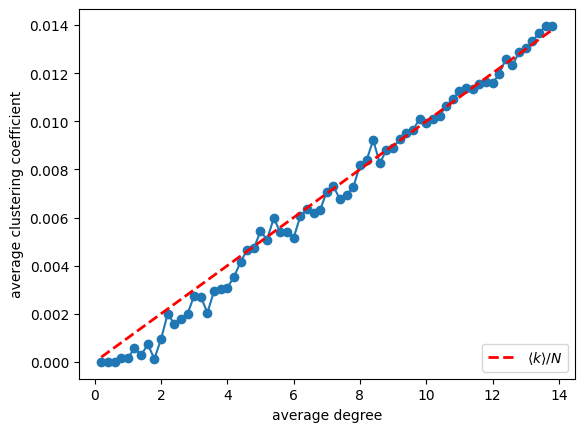

In [48]:
plt.plot(krange, Avg_cls, 'o-')
plt.plot(krange, [k/N for k in krange], 'r--',lw=2,label=r'$\langle k \rangle/N$')
plt.xlabel('average degree')
plt.ylabel('average clustering coefficient')
plt.legend(loc='lower right')
plt.show()

最短距离随着平均度的变化

在平均度比较大的情况下：
$$d = \frac{\ln N}{\ln K}$$

## 网络社团划分


### GN benchmark

GN模型是常用的含有社团结构的网络模型。给定网络的节点数N，社团数C，社团内的平均连接度zin，社团间的平均连接度zout。

In [55]:
## GN benchmark
import random

N = 126  # 网络规模
C = 3    # 社团数量
zin = 13 #社团内的连边数
zout = 3 #社团间的连边数


n = N/C # 每个社团的节点数

nodes = []
nall = []
for a in ['a','b','c']:
    xx = []
    for i in range(int(n)):
        xx.append(a+str(i))
    nodes += xx
    nall.append(xx)

pin = 1.0*zin/(n-1)/2
pout = 1.0*zout/(3*n-1)/2

g = nx.Graph()

for nc in nall:
    for i in nc:
        for j in nc:
            if i==j:
                continue
            p = random.random()
            if p<pin:
                g.add_edge(i,j)
        for j in set(nodes)-set(nc):
            p = random.random()
            if p<pout:
                g.add_edge(i,j)

### 利用 laplacian矩阵进行社团划分

1. 计算laplacian矩阵
2. 计算L矩阵的特征值和特征向量($0=\lambda_0 < \lambda_1 < \lambda_2 \dots$)
3. 利用前几大特征值对应的特征向量进行聚类

In [56]:
lap_g = nx.laplacian_matrix(g) # laplacian matrix of g

In [57]:
eigval,eigvec = np.linalg.eigh(lap_g.todense())

之前生成的GN网络有3个社团，取第1和第2特征向量

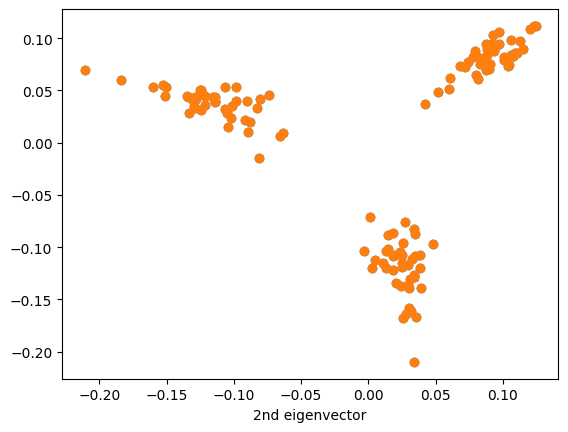

In [59]:
plt.plot(eigvec[:,1],eigvec[:,2],'o')
plt.xlabel('1st eigenvector')
plt.xlabel('2nd eigenvector')
plt.show()

## 网络动力学

### 疾病传播

#### SIR
S状态的节点以概率$\beta$被处于I状态的邻居感染，I状态的节点以概率$\gamma$恢复为R状态节点。

In [66]:
## SIR 模型

def suspect_infect_recovery(G, sources, beta, gamma, T='inf'):
    state = {i:'S' for i in G}
    for s in sources:
        state[s] = 'I'
    if T=='inf':
        dt = 0
    else:
        dt = 1
    iterator = 0
    flag = False
    T = 100
    while iterator < T:
        iterator += dt
        if flag:
            return state
        flag = True
        state_temp = state.copy()
        for i in G:
            if state[i] == 'S':
                nbs = sum([1 for j in G.neighbors(i) if state[j]=="I"])
                if nbs == 0:
                    continue
                if random.random() < (1 - (1-beta)**nbs):
                    state_temp[i] = 'I'
            elif state[i] == 'I':
                flag = False
                if random.random() < gamma:
                    state_temp[i] = 'R'
        state = state_temp.copy()
    return state

In [67]:
beta = 0.3
gamma = 1
g = nx.karate_club_graph()

state = suspect_infect_recovery(g,[1],beta,gamma)
print('各个节点的状态: ',state)
print('总感染数: ',sum([1 for i in state if state[i]!='S']))

各个节点的状态:  {0: 'R', 1: 'R', 2: 'S', 3: 'R', 4: 'S', 5: 'S', 6: 'S', 7: 'R', 8: 'R', 9: 'S', 10: 'S', 11: 'S', 12: 'R', 13: 'R', 14: 'S', 15: 'S', 16: 'S', 17: 'R', 18: 'S', 19: 'R', 20: 'S', 21: 'R', 22: 'S', 23: 'S', 24: 'S', 25: 'S', 26: 'S', 27: 'S', 28: 'S', 29: 'S', 30: 'S', 31: 'S', 32: 'S', 33: 'S'}
总感染数:  10
